# Conclusions and Inferences

    The first conclusion I can reach from this analysis of the data is that Capomulin and Ramicane are both promising drugs.  Both drugs had substantially higher numbers of measurements taken per mouse (likely indicating higher survival rates among mice treated with these drugs) and smaller average tumor sizes compared to a placebo.
    The second conclusion I can reach is that all other drugs tested are not very promising.  In terms of number of measurements taken (a measure of mouse survival) and in terms of average tumor size over time, all the other drugs did little better than a placebo (if any better).
    Finally, for mice tested with Capomulin, the average tumor size across all measurements of each mouse correlated strongly with the size of the mouse.  Under the conditions of this particular study, tumors of smaller mice shrank more than tumors of larger mice.  The mice varied substantially in size, with the largest mice more than half again the mass of the smallest mice.  If all mice were given the same dose of the drug, then that could produce a wide variation in amount of drug per gram of mouse, which could cause the trend found in the data.

In [1]:
#import libraries used
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

#find the data
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"
#read the data into dataframes
mouse_df = pd.read_csv(mouse_path)
study_df = pd.read_csv(study_path)

In [2]:
#merge the data into a single dataframe
combined_df = pd.merge(mouse_df,study_df,on="Mouse ID")
#print the number of unique mice
print(f'There are {len(combined_df["Mouse ID"].unique())} distinct mice in the data.')

There are 249 distinct mice in the data.


In [3]:
#find mice with repeated timepoints
repeats=combined_df.loc[combined_df.duplicated(["Mouse ID", "Timepoint"],keep=False),:]["Mouse ID"].unique()
#for each mouse with repeated timepoints, print all the data associated with the mouse, even non-duplicate data.
for mouse in repeats:
    print(combined_df.loc[combined_df["Mouse ID"] == mouse,:])
#note that while there is only one mouse in this dataset with repeated timepoints, this should work for multiple such mice.

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [4]:
#create a dataframe for the cleaned data
cleaned_df=combined_df
#for each mouse with repeated timepoints, remove that mouse from the cleaned data
for mouse in repeats:
    cleaned_df = cleaned_df.loc[cleaned_df["Mouse ID"] != mouse,:]
#this should also still work if there were multiple mice with repeated timepoints
#print number of mice without repeated timepoints.
print(f"There are {len(cleaned_df['Mouse ID'].unique())} mice without repeated timepoints")

There are 248 mice without repeated timepoints


In [5]:
#create series for various statistics, grouped by Drug Regimen.
#calculate mean
summary_mean=cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#calculate median
summary_median=cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#calculate variance
summary_var=cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#calculate standard deviation
summary_std=cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#calculate standard error of the mean
summary_sem=cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
#create a dataframe putting all the statistics together
summary_df1 = pd.DataFrame({"Mean":summary_mean,"Median":summary_median,"Variance":summary_var,"Standard Deviation":summary_std,"Standard Error of the Mean":summary_sem})
#print the results
summary_df1

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
#Use pd.DataFrame.groupby.agg method to do the same calculations in one line and print results.
cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean","median","var","std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

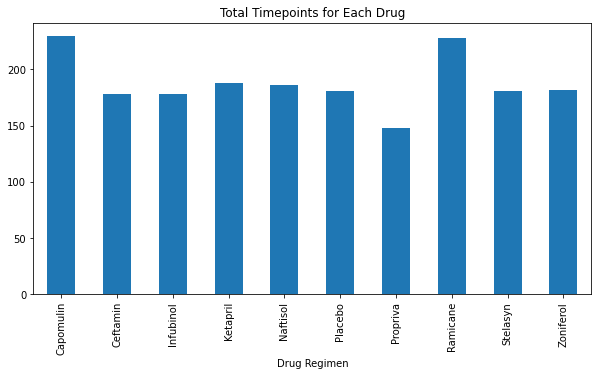

In [7]:
#plot the count of timepoints for each drug (important as a measure of survival among mice on that drug)
cleaned_df.groupby("Drug Regimen").count()["Timepoint"].plot(kind="bar",figsize=[10,5],title="Total Timepoints for Each Drug")
#I would have included a label on the vertical axis, but ylabel wasn't implemented in pandas until a later version of pandas than is included in the PythonData environment.  Sorry...

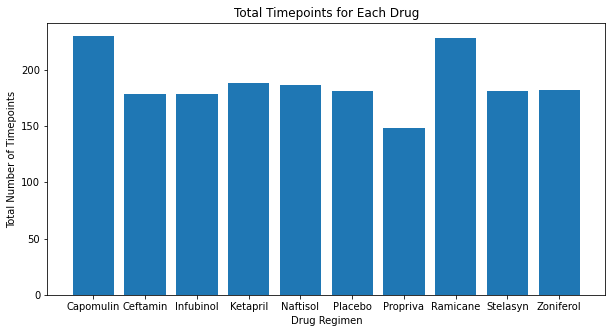

In [8]:
#plot count of timepoints with matplotlib.pyplot
#adjust figure size
plt.figure(figsize=[10,5])
#title the graph
plt.title("Total Timepoints for Each Drug")
#label the axes of the graph
plt.ylabel("Total Number of Timepoints")
plt.xlabel("Drug Regimen")
#produce and show the graph
plt.bar(cleaned_df.groupby("Drug Regimen").count().index,cleaned_df.groupby("Drug Regimen").count()["Timepoint"])
plt.show()

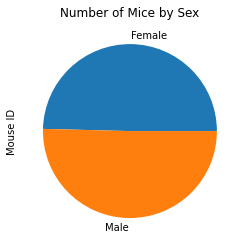

In [9]:
#produce a pie chart of how many male and female mice there were
cleaned_df.drop_duplicates("Mouse ID").groupby("Sex").count()["Mouse ID"].plot(kind="pie",title="Number of Mice by Sex")

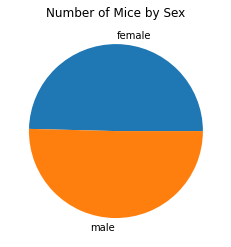

In [10]:
#produce another pie chart of how many male and female mice there were
plt.title("Number of Mice by Sex")

plt.pie(cleaned_df.drop_duplicates("Mouse ID").groupby("Sex").count()["Mouse ID"],labels=["female","male"])
plt.show()

Capomulin:
First quartile:  32.37735684
Second quartile:  38.125164399999996
Third quartile:  40.1592203
Interquartile Range is 7.781863460000004
Capomulin has 0 outlier(s) above the middle of the data
Capomulin has 0 outlier(s) below the middle of the data
--------------------
Ramicane:
First quartile:  31.56046955
Second quartile:  36.56165229
Third quartile:  40.65900627
Interquartile Range is 9.098536719999998
Ramicane has 0 outlier(s) above the middle of the data
Ramicane has 0 outlier(s) below the middle of the data
--------------------
Infubinol:
First quartile:  54.04860769
Second quartile:  60.16518046
Third quartile:  65.52574285
Interquartile Range is 11.477135160000003
Infubinol has 0 outlier(s) above the middle of the data
Infubinol has 1 outlier(s) below the middle of the data
--------------------
Ceftamin:
First quartile:  48.72207785
Second quartile:  59.85195552
Third quartile:  64.29983003
Interquartile Range is 15.577752179999997
Ceftamin has 0 outlier(s) above the m

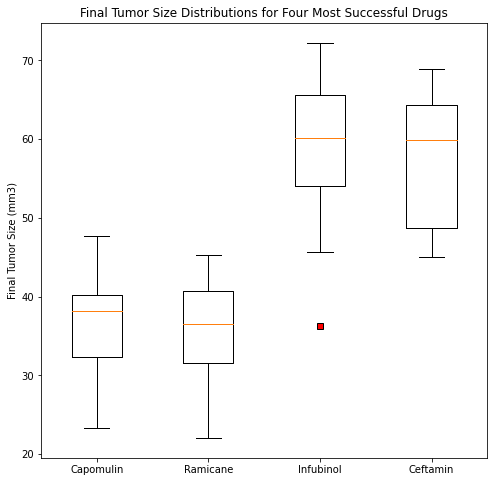

In [11]:
#make a dataframe of just Capomulin, Ramicane, Infubinol, and Ceftamin data
top_four=cleaned_df.loc[((cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")),:]
#drop all but the last timepoint for each mouse
finals_top_four=top_four.drop_duplicates("Mouse ID",keep="last")
#make a list to store lists of tumor volumes
all_vols = []
#loop over drugs specified
for drug in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    #print drug name
    print(drug + ":")
    #pull out the final tumor volumes for each drug
    vols=finals_top_four.loc[finals_top_four["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    #calculate quartiles
    quart=vols.quantile([.25,.5,.75])
    #print quartiles
    print(f"First quartile:  {quart[.25]}")
    print(f"Second quartile:  {quart[.5]}")
    print(f"Third quartile:  {quart[.75]}")
    iqr = quart[.75]-quart[.25]
    print(f"Interquartile Range is {iqr}")
    #find and count outliers
    upper_outliers=vols.loc[vols>quart[.75]+1.5*iqr]
    print(f"{drug} has {len(upper_outliers)} outlier(s) above the middle of the data")
    lower_outliers=vols.loc[vols<quart[.25]-1.5*iqr]
    print(f"{drug} has {len(lower_outliers)} outlier(s) below the middle of the data")
    print("--------------------")
    #append the series of volumes to the list of all volumes to produce a list of series
    all_vols.append(vols)

#produce a box plot of final tumor size by drug using the list of series of volumes
plt.figure(figsize=[8,8])
plt.ylabel("Final Tumor Size (mm3)")
plt.title("Final Tumor Size Distributions for Four Most Successful Drugs")
plt.boxplot(all_vols,labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],flierprops={"markerfacecolor":"red","marker":"s"})
plt.show()
#This part may not have followed the substeps listed in the instructions, but I think my way was easier for me given that I found the .drop_duplicates method earlier in the challenge.
#I believe it still produces all the requested output.

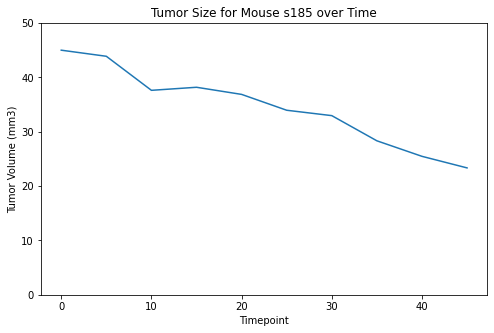

In [12]:
#pull out the data for one particular mouse that took Capomulin
s185_data = cleaned_df.loc[cleaned_df["Mouse ID"]=="s185",["Timepoint", "Tumor Volume (mm3)"]]
#produce a plot of its tumor size over time
plt.figure(figsize=[8,5])
plt.ylim(0,50)
plt.title("Tumor Size for Mouse s185 over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(s185_data["Timepoint"],s185_data["Tumor Volume (mm3)"])
plt.show()

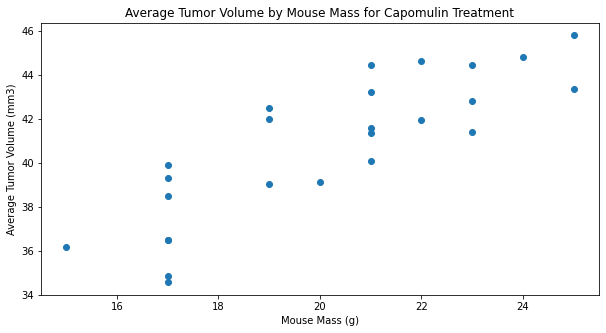

In [13]:
#pull out data for just Capomulin
cap = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID").mean()

#produce a plot of average tumor size as a function of mouse mass
plt.figure(figsize=[10,5])
plt.title("Average Tumor Volume by Mouse Mass for Capomulin Treatment")
plt.xlabel("Mouse Mass (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(cap["Weight (g)"],cap["Tumor Volume (mm3)"])
plt.show()


Average Tumor Volume = 0.9544396890241045 * Mass + 21.552160532685015
Correlation Coefficient:  0.8419363424694718


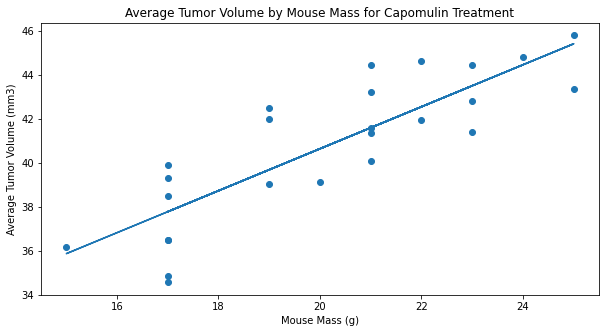

In [14]:
#perform a linear regression on the average tumor size vs mass data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap["Weight (g)"],cap["Tumor Volume (mm3)"])
#print the equation of the line
print(f"Average Tumor Volume = {slope} * Mass + {intercept}")
#print the correlation coefficient
print(f"Correlation Coefficient:  {rvalue}")

#produce a plot of average tumor size as a function of mouse mass with a linear regression plotted on top
plt.figure(figsize=[10,5])
plt.title("Average Tumor Volume by Mouse Mass for Capomulin Treatment")
plt.xlabel("Mouse Mass (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(cap["Weight (g)"],cap["Tumor Volume (mm3)"])
plt.plot(cap["Weight (g)"],slope*cap["Weight (g)"]+intercept)
plt.show()
